# Experiments Notebook 2

In [1]:
import os
import os.path
import pickle
import bz2
from glob import glob
import random
import shutil
from datetime import datetime
from tqdm.auto import tqdm
import importlib


import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
from kerashypetune import KerasGridSearch
import matplotlib.pyplot as plt

import preprocessing as pp
import dsci592.model as dsci

In [2]:
importlib.reload(dsci)

<module 'dsci592.model' from '/home/noah/projects/drexel/dsci592/DS-capstone-pt1/code/src/dsci592/model.py'>

### Batch Normalization

In [32]:
# Selected model trained to convergence, multiple dense layers

train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds()

input = keras.layers.Input(shape=(30,100), name='Input')
lstm1 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-1')(input)
dropout1 = keras.layers.Dropout(0.20, name='Dropout-1')(lstm1)
batchnorm1 = keras.layers.BatchNormalization(name='Batch-Normalization-1')(dropout1)
lstm2 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-2')(batchnorm1)
dropout2 = keras.layers.Dropout(0.20, name='Dropout-2')(lstm2)
batchnorm2 = keras.layers.BatchNormalization(name='Batch-Normalization-2')(dropout2)
lstm3 = keras.layers.LSTM(256, return_sequences=True,  name='LSTM-3')(batchnorm2)
batchnorm3 = keras.layers.BatchNormalization(name='Batch-Normalization-3')(lstm3)
output = keras.layers.Dense(1, name='Output')(batchnorm3)
model = keras.models.Model(inputs=input, outputs=output, name='Covid-Prediction-30-1-Batchnorm')
print(model.summary())



Model: "Covid-Prediction-30-1-Batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30, 100)]         0         
                                                                 
 LSTM-1 (LSTM)               (None, 30, 256)           365568    
                                                                 
 Dropout-1 (Dropout)         (None, 30, 256)           0         
                                                                 
 Batch-Normalization-1 (Batc  (None, 30, 256)          1024      
 hNormalization)                                                 
                                                                 
 LSTM-2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Dropout-2 (Dropout)         (None, 30, 256)           0         
                                   

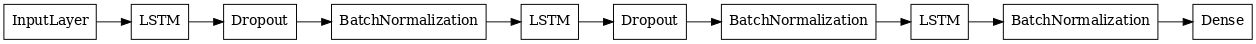

In [33]:
keras.utils.plot_model(model, to_file='model_3_256_selected_batchnorm.png', show_shapes=False, show_dtype=False, 
                       show_layer_activations=False, rankdir='LR', dpi=70, show_layer_names=False)

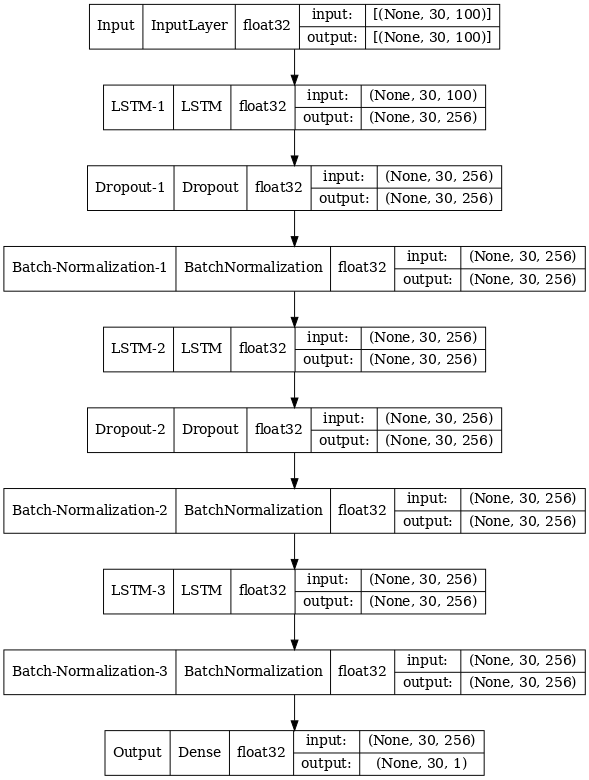

In [37]:
keras.utils.plot_model(model, to_file='model_3_256_selected_batchnorm_detailed.png', show_shapes=True, show_dtype=True, 
                       show_layer_activations=False, rankdir='TB', dpi=70)

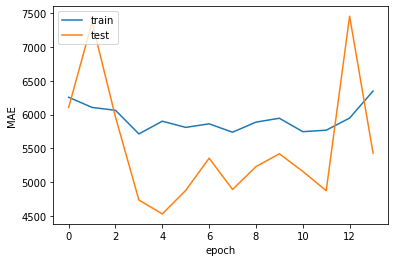

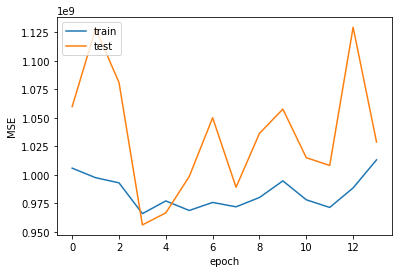

In [10]:
history = history_selected_batchnorm
plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('selected_model_batchnorm_training_mae.png')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('selected_model_batchnorm_training_mse.png')
plt.show()

### Selected model, first column only

In [3]:
# Selected model trained to convergence

train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds(cols=[0,1])

input = keras.layers.Input(shape=(30,1), name='Input')
lstm1 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-1')(input)
dropout1 = keras.layers.Dropout(0.20, name='Dropout-1')(lstm1)
lstm2 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-2')(dropout1)
dropout2 = keras.layers.Dropout(0.20, name='Dropout-2')(lstm2)
lstm3 = keras.layers.LSTM(256, return_sequences=True,  name='LSTM-3')(dropout2)
output = keras.layers.Dense(1, name='Output')(lstm3)
model = keras.models.Model(inputs=input, outputs=output, name='Covid-Prediction-30-1-Simple')
print(model.summary())


2022-03-01 20:25:19.428424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 20:25:19.428908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 20:25:19.481418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 20:25:19.481676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 20:25:19.481910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "Covid-Prediction-30-1-Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30, 1)]           0         
                                                                 
 LSTM-1 (LSTM)               (None, 30, 256)           264192    
                                                                 
 Dropout-1 (Dropout)         (None, 30, 256)           0         
                                                                 
 LSTM-2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Dropout-2 (Dropout)         (None, 30, 256)           0         
                                                                 
 LSTM-3 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Output (Dense)              (None, 30

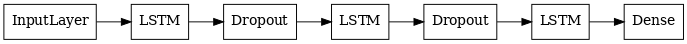

In [4]:
keras.utils.plot_model(model, to_file='model_3_256_simple.png', show_shapes=False, show_dtype=False, 
                       show_layer_activations=False, rankdir='LR', dpi=70, show_layer_names=False)


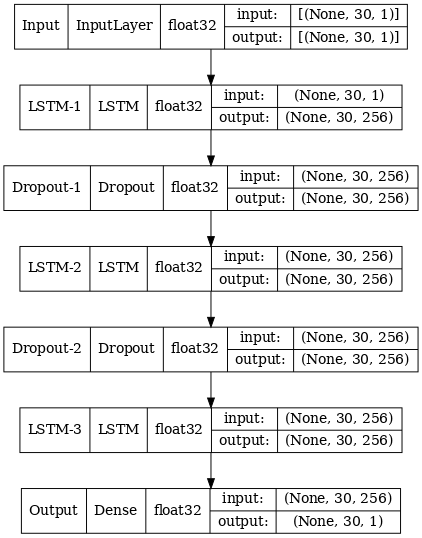

In [5]:
keras.utils.plot_model(model, to_file='model_3_256_selected_simple.png', show_shapes=True, show_dtype=True, 
                       show_layer_activations=False, rankdir='TB', dpi=70)


In [7]:
NAME='simple_model'
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.01),  loss='mae',  metrics=['mse', 'mae'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/model/covid_lstm_simple.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='mae', patience=10, restore_best_weights=True)
tensorboard = keras.callbacks.TensorBoard(log_dir="./logs/{}".format(NAME))
history_simple = model.fit(train_ds, epochs=1024, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard]
                   )

Epoch 1/1024


2022-03-01 20:25:46.792011: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302


1201/1201 [==============================] - 131s 106ms/step - loss: 6927.1465 - mse: 1051452736.0000 - mae: 6927.1777 - val_loss: 6510.2612 - val_mse: 1105788544.0000 - val_mae: 6510.2578
Epoch 2/1024
1201/1201 [==============================] - 130s 108ms/step - loss: 6250.8198 - mse: 1030523200.0000 - mae: 6250.8384 - val_loss: 6245.0952 - val_mse: 1087438080.0000 - val_mae: 6245.0977
Epoch 3/1024
1201/1201 [==============================] - 132s 110ms/step - loss: 5878.4888 - mse: 1013063168.0000 - mae: 5878.5176 - val_loss: 5677.7710 - val_mse: 1071371648.0000 - val_mae: 5677.7715
Epoch 4/1024
1201/1201 [==============================] - 132s 110ms/step - loss: 5774.3237 - mse: 1003306048.0000 - mae: 5774.3491 - val_loss: 6380.3203 - val_mse: 1067488192.0000 - val_mae: 6380.3193
Epoch 5/1024
1201/1201 [==============================] - 132s 110ms/step - loss: 5509.1562 - mse: 990877440.0000 - mae: 5509.1880 - val_loss: 5253.7568 - val_mse: 1048826816.0000 - val_mae: 5253.7554
Epoc

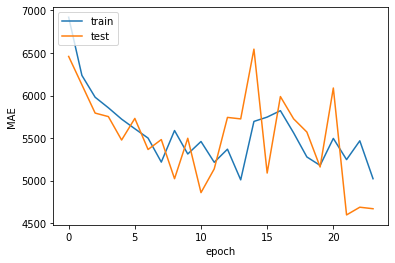

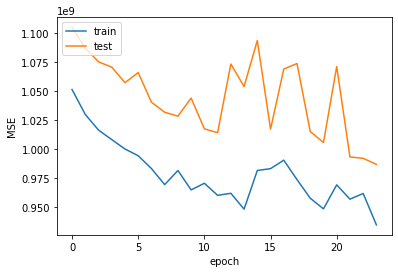

In [36]:
history = history_simple
plt.plot(history.history['loss'])
plt.plot(history.history['val_mae'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('simple_model_training_mae.png')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('simple_model_training_mse.png')
plt.show()


### Selected model with targets, time encoding, geoencoding

In [40]:
train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds(cols=[0,15])

input = keras.layers.Input(shape=(30,15), name='Input')
lstm1 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-1')(input)
dropout1 = keras.layers.Dropout(0.20, name='Dropout-1')(lstm1)
lstm2 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-2')(dropout1)
dropout2 = keras.layers.Dropout(0.20, name='Dropout-2')(lstm2)
lstm3 = keras.layers.LSTM(256, return_sequences=True,  name='LSTM-3')(dropout2)
output = keras.layers.Dense(1, name='Output')(lstm3)
model = keras.models.Model(inputs=input, outputs=output, name='Covid-Prediction-30-1-Simple-2')
print(model.summary())

Model: "Covid-Prediction-30-1-Simple-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30, 15)]          0         
                                                                 
 LSTM-1 (LSTM)               (None, 30, 256)           278528    
                                                                 
 Dropout-1 (Dropout)         (None, 30, 256)           0         
                                                                 
 LSTM-2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Dropout-2 (Dropout)         (None, 30, 256)           0         
                                                                 
 LSTM-3 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Output (Dense)              (None, 

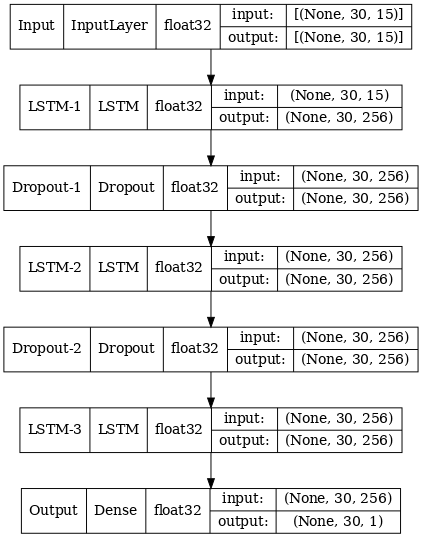

In [41]:
keras.utils.plot_model(model, to_file='model_3_256_simple-2.png', show_shapes=True, show_dtype=True, 
                       show_layer_activations=False, rankdir='TB', dpi=70)

In [42]:
NAME='simple_model-2'
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.01),  loss='mae',  metrics=['mse', 'mae'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/model/covid_lstm_simple_2.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='mae', patience=20, restore_best_weights=True)
tensorboard = keras.callbacks.TensorBoard(log_dir="./logs/{}".format(NAME))
history_simple_2 = model.fit(train_ds, epochs=1024, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard]
                   )

Epoch 1/1024
1201/1201 [==============================] - 131s 107ms/step - loss: 6914.8389 - mse: 1051198336.0000 - mae: 6914.8643 - val_loss: 6454.2129 - val_mse: 1105264512.0000 - val_mae: 6454.2119
Epoch 2/1024
1201/1201 [==============================] - 132s 109ms/step - loss: 6258.5938 - mse: 1030937024.0000 - mae: 6258.6167 - val_loss: 6089.4053 - val_mse: 1087180032.0000 - val_mae: 6089.4067
Epoch 3/1024
1201/1201 [==============================] - 133s 110ms/step - loss: 5929.6758 - mse: 1014001920.0000 - mae: 5929.6987 - val_loss: 5846.6558 - val_mse: 1073116352.0000 - val_mae: 5846.6548
Epoch 4/1024
1201/1201 [==============================] - 133s 110ms/step - loss: 5690.1226 - mse: 1002595584.0000 - mae: 5690.1548 - val_loss: 5449.9131 - val_mse: 1060847936.0000 - val_mae: 5449.9141
Epoch 5/1024
1201/1201 [==============================] - 133s 110ms/step - loss: 5719.6943 - mse: 996726400.0000 - mae: 5719.7222 - val_loss: 5587.8740 - val_mse: 1055653568.0000 - val_mae: 5

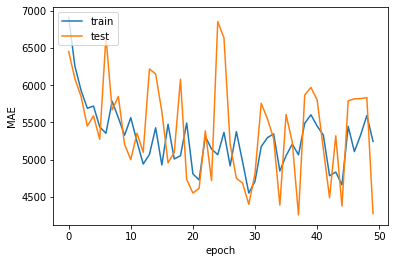

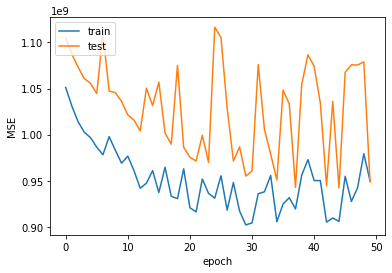

In [45]:
history = history_simple_2
plt.plot(history.history['loss'])
plt.plot(history.history['val_mae'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('simple2_model_training_mae.png')
_ = plt.show()



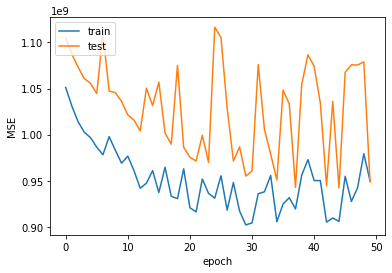

In [46]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('simple2_model_training_mse.png')
_ = plt.show()

In [13]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
a[:,0:1]

array([[0],
       [3],
       [6]])

In [27]:
train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds(cols=[0,1])
for x, y in train_ds:
    print(x.shape, y.shape)
    for xx in x:
        print(xx.shape)
        print(xx)
        break
    break

(995, 30, 1) (995, 1, 1)
(30, 1)
tf.Tensor(
[[417.]
 [427.]
 [431.]
 [438.]
 [444.]
 [445.]
 [447.]
 [453.]
 [459.]
 [460.]
 [475.]
 [480.]
 [480.]
 [482.]
 [491.]
 [490.]
 [498.]
 [497.]
 [507.]
 [507.]
 [509.]
 [514.]
 [517.]
 [523.]
 [537.]
 [551.]
 [562.]
 [574.]
 [576.]
 [577.]], shape=(30, 1), dtype=float32)


In [25]:
train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds()
for x, y in train_ds:
    print(x.shape, y.shape)
    for xx in x:
        print(xx.shape)
        print(xx)
        break
    break

(995, 30, 100) (995, 1, 1)
(30, 100)
tf.Tensor(
[[ 4.17000000e+02  1.50000000e+01 -9.45367515e-02 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]
 [ 4.27000000e+02  1.50000000e+01 -1.11659005e-01 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]
 [ 4.31000000e+02  1.50000000e+01 -1.28748178e-01 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]
 ...
 [ 5.74000000e+02  1.50000000e+01 -5.30730069e-01 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]
 [ 5.76000000e+02  1.50000000e+01 -5.45240462e-01 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]
 [ 5.77000000e+02  1.50000000e+01 -5.59589267e-01 ...  3.93556654e-01
   4.56944197e-01  8.22348297e-02]], shape=(30, 100), dtype=float32)
